In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hackathon/Hackathon_4.0_ML_Guidelines.pdf
/kaggle/input/hackathon/Train_dataset.xlsx
/kaggle/input/hackathon/Solution_Sheet.docx
/kaggle/input/hackathon/Variable_Description.xlsx
/kaggle/input/hackathon/Test_dataset.xlsx


In [40]:
train_data = pd.read_excel("/kaggle/input/hackathon/Train_dataset.xlsx", index_col=0, sheet_name="Train_dataset")
train_data = train_data.dropna(subset=['Occupation', 'Mode_transport', 'comorbidity', 'cardiological pressure'])
print(train_data.shape)

(9665, 27)


In [41]:
# Columns to be label encoded
    ## Region
    ## Gender
    ## Married
    ## Occupation
    ## Mode_transport
    ## comorbidity
    ## Pulmonary score
    ## cardiological pressure

# Columns that should be considered for binning
    ## Diuresis (check online for values)
    ## HDL cholestrol (low, medium, high)
    ## Blood Glucose

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_data['Region'] = le.fit_transform(train_data['Region'])
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Married'] = le.fit_transform(train_data['Married'])
train_data['Occupation'] = le.fit_transform(train_data['Occupation'])
train_data['Mode_transport'] = le.fit_transform(train_data['Mode_transport'])
train_data['comorbidity'] = le.fit_transform(train_data['comorbidity'])
train_data['Pulmonary score'] = le.fit_transform(train_data['Pulmonary score'])
train_data['cardiological pressure'] = le.fit_transform(train_data['cardiological pressure'])

train_data.head()

,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
people_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,Mrs,mansi,1,1.0,4,1,2,0,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
2,1,0,Mrs,riya masi,1,2.0,4,2,2,0,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
3,1,0,Mrs,sunita,0,1.0,1,1,2,0,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
4,1,0,Mrs,anjali @ babli,1,1.0,3,0,2,0,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
5,1,0,Mrs,champa karketta,0,2.0,6,0,2,0,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [42]:
## Plotting correlation matrix
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

corr = train_data.corr(method=histogram_intersection)

print(corr['Infect_Prob'].sort_values())

# features to drop
    ## salary
    ## insurance
    ## d-dimer
    ## Designation
    ## Name
    ## Gender
    ## deaths/1M
    ## Married
    ## FT/month
    ## Mode_transport
    ## Children
    ## cardiological pressure
    ## Pulmonary score
    ## comorbidity
    ## Region

Infect_Prob                    1.0
Gender                      4785.0
Deaths/1M                   5092.0
Married                     8046.0
FT/month                    9020.0
Mode_transport              9712.0
Children                   10458.0
cardiological pressure     14487.0
Pulmonary score            14546.0
comorbidity                14574.0
Region                     15475.0
cases/1M                   31908.0
Occupation                 39085.0
Blood Glucose              48574.0
Coma score                 87232.0
Charlson Index            193325.5
Age                       381140.7
Platelets                 411529.6
Heart rate                433501.6
d-dimer                   442248.3
HDL cholesterol           449345.4
Diuresis                  464070.4
HBB                       471939.8
Insurance                 482873.4
salary                    500614.6
Name: Infect_Prob, dtype: float64


In [43]:
train_data = train_data.drop([ 'Name', 'Designation', 'Gender', 'Deaths/1M', 'Married', 'FT/month', 
                              'Mode_transport', 'Children', 'cardiological pressure', 'Pulmonary score', 'comorbidity', 'Region'], axis=1)

In [44]:
train_data.columns

Index(['Occupation', 'cases/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'Infect_Prob'],
      dtype='object')

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 1 to 22695
Data columns (total 15 columns):
Occupation         9665 non-null int64
cases/1M           9665 non-null int64
Age                9665 non-null int64
Coma score         9665 non-null int64
Diuresis           8968 non-null float64
Platelets          8741 non-null float64
HBB                9649 non-null float64
d-dimer            8551 non-null float64
Heart rate         8551 non-null float64
HDL cholesterol    9646 non-null float64
Charlson Index     9665 non-null int64
Blood Glucose      9665 non-null int64
Insurance          9325 non-null float64
salary             9665 non-null int64
Infect_Prob        9665 non-null float64
dtypes: float64(8), int64(7)
memory usage: 1.2 MB


In [46]:
train_data.shape

(9665, 15)

In [47]:
train_data.dtypes

Occupation           int64
cases/1M             int64
Age                  int64
Coma score           int64
Diuresis           float64
Platelets          float64
HBB                float64
d-dimer            float64
Heart rate         float64
HDL cholesterol    float64
Charlson Index       int64
Blood Glucose        int64
Insurance          float64
salary               int64
Infect_Prob        float64
dtype: object

In [48]:
# Checking for missing values
train_data.isnull().sum()

Occupation            0
cases/1M              0
Age                   0
Coma score            0
Diuresis            697
Platelets           924
HBB                  16
d-dimer            1114
Heart rate         1114
HDL cholesterol      19
Charlson Index        0
Blood Glucose         0
Insurance           340
salary                0
Infect_Prob           0
dtype: int64

In [49]:
# Do something for NaN values

# Mark empty cells as NaN
train_data['Diuresis'] = train_data['Diuresis'].replace(r'^\s*$', np.nan, regex=True)
train_data['Platelets'] = train_data['Platelets'].replace(r'^\s*$', np.nan, regex=True)
train_data['HBB'] = train_data['HBB'].replace(r'^\s*$', np.nan, regex=True)
train_data['d-dimer'] = train_data['d-dimer'].replace(r'^\s*$', np.nan, regex=True)
train_data['Heart rate'] = train_data['Heart rate'].replace(r'^\s*$', np.nan, regex=True)
train_data['HDL cholesterol'] = train_data['HDL cholesterol'].replace(r'^\s*$', np.nan, regex=True)
train_data['Insurance'] = train_data['Insurance'].replace(r'^\s*$', np.nan, regex=True)

# Fill NaN with median values
train_data['Diuresis'] = train_data['Diuresis'].fillna(train_data['Diuresis'].median())
train_data['Platelets'] = train_data['Platelets'].fillna(train_data['Platelets'].median())
train_data['HBB'] = train_data['HBB'].fillna(train_data['HBB'].median())
train_data['d-dimer'] = train_data['d-dimer'].fillna(train_data['d-dimer'].median())
train_data['Heart rate'] = train_data['Heart rate'].fillna(train_data['Heart rate'].median())
train_data['HDL cholesterol'] = train_data['HDL cholesterol'].fillna(train_data['HDL cholesterol'].median())
train_data['Insurance'] = train_data['Insurance'].fillna(train_data['Insurance'].median())

In [50]:
train_data.isnull().sum()

Occupation         0
cases/1M           0
Age                0
Coma score         0
Diuresis           0
Platelets          0
HBB                0
d-dimer            0
Heart rate         0
HDL cholesterol    0
Charlson Index     0
Blood Glucose      0
Insurance          0
salary             0
Infect_Prob        0
dtype: int64

In [51]:
# if Infect_Prob is > 60 mark as infected
# do this when not using neural network
# train_data['Infect_Prob'].loc[train_data['Infect_Prob'] >= 60] = int(1)
# train_data['Infect_Prob'].loc[train_data['Infect_Prob'] != 1] = int(0)
# train_data['Infect_Prob'] = train_data['Infect_Prob'].astype(int)
# print(train_data['Infect_Prob'])

In [52]:
# Find highly correlated features to reduce model complexity
# but first train model and find out if this is really needed

In [53]:
# Occupation
print(train_data['Occupation'].value_counts())

5    1131
6    1091
4    1087
8    1085
7    1080
1    1072
2    1055
3    1038
0    1026
Name: Occupation, dtype: int64


In [54]:
# Coma score
print(train_data['Coma score'].value_counts())

10    770
12    763
7     762
9     761
8     752
11    748
4     743
5     739
15    738
14    735
6     730
13    727
3     697
Name: Coma score, dtype: int64


In [55]:
# Diuresis
print(train_data['Diuresis'].value_counts())

276.0    728
323.0     45
390.0     45
415.0     44
329.0     42
        ... 
419.0     15
281.0     15
438.0     14
309.0     14
385.0     13
Name: Diuresis, Length: 341, dtype: int64


In [56]:
# Charlson Index
print(train_data['Charlson Index'].value_counts())

31    266
40    263
7     263
3     260
22    260
12    254
8     252
36    251
16    249
5     249
28    248
23    247
33    242
2     241
15    241
38    240
21    238
17    237
20    236
29    235
27    234
4     233
24    233
6     232
9     232
32    232
25    231
37    231
14    231
0     230
19    226
26    225
35    222
34    222
13    222
10    217
30    211
39    211
18    210
11    207
1     201
Name: Charlson Index, dtype: int64


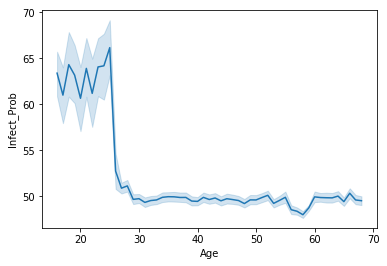

In [57]:
# Let's see age vs infection probability
sns.lineplot(x=train_data['Age'], y=train_data['Infect_Prob'])
# Looks like the young working and actively travelling population are at higher risk of getting infected 
# compared to elder people who have a 50-50 chance

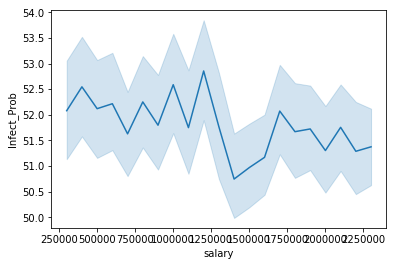

In [58]:
# Let's see salary vs infection probability
sns.lineplot(x=train_data['salary'], y=train_data['Infect_Prob']) #hue=train_data['Gender'])

In [59]:
# Removing irrelevnat features
# Region - living in an unsafe region increases your chances of being infected (IMP)
# Gender - there's a divide in india between genders, males normally work and go outside and are at higher risk (IMP)
# Designation - not relevant (check unique count) (DROP)
# Name - not relevant (DROP)
# Married - if any family member is infected there's a high chance rest of the members will also be infected (IMP)
# Children - if any family member is infected there's a high chance rest of the members will also be infected (IMP)
# Occupation - some occupations possess higher risk of infection (IMP)
# Mode_transport - some mode of transport possess higher risk of infection 
# cases/1M - (IMP)
# Deaths/1M - (IMP)
# comorbidity - people with lung disease/diabetes are at higher risk of dying (IMP)
# Age - younger and older people are at high risk (IMP)
# Coma score - Glasgow comma score, people with low scores should be at higher risk (IMP)

# poor scores in below values are normally present in elderly who are at greater risk of infection
    ## Pulmonary score - lower score indicates higher chance of organ failure (IMP)
    ## cardiological pressure - higher values can indicate heart problems (IMP)
    ## Diuresis - Higher values can indicate diabetes therefore high rinsk of getting infected and (IMP)
    ## HDL cholesterol - higher values are bad (IMP)
# Platelets - (IMP)
# HBB - (IMP)
# d-dimer - (IMP)
# Heart rate - (IMP)

# Charlson Index - Higher scores indicate patient is already fighting off some kind of infection/disease (IMP)
# Blood Glucose - High blood glucose indicates diabetes, which puts the person in more risk for infection (IMP)
# Insurance - not relevant because treatment is taken care by govt (DROP)
# salary - not relevant (IMP)
# FT/month - people travelling to/from infected contries pose higher risk of infection (IMP)

In [60]:
train_data.columns

Index(['Occupation', 'cases/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'Infect_Prob'],
      dtype='object')

In [137]:
# Divide data into x and labels
x = train_data.iloc[ :, :14]
y = train_data.iloc[ :, -1]
print(x.shape, y.shape)

(9665, 14) (9665,)


In [138]:
# Scale data
from sklearn import preprocessing

sc = preprocessing.MinMaxScaler()
x = sc.fit_transform(x)
y = y/100
print(x.shape)
print(y.shape)

(9665, 14)
(9665,)


In [139]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7732, 14) (7732,)
(1933, 14) (1933,)


In [151]:
pd.options.display.max_rows = 2000

In [153]:
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models
models = []
models.append(('LinearRegression', LinearRegression()))
# models.append(('LogisticRegression', LogisticRegression()))

results = []
names = []

#Training and validation for all models
for name, model in models:
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
#     print(name, mean_squared_error(y_test, predictions))
#     print(name, clf.score(x_train, y_train))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

             Actual  Predicted
people_ID                     
18460      0.515888   0.540352
10058      0.539200   0.580118
9136       0.624845   0.605259
15163      0.481423   0.494015
2401       0.465781   0.544357
9922       0.524514   0.530725
16195      0.494684   0.476755
566        0.937267   0.549834
411        0.507100   0.482347
14580      0.456424   0.470466
5164       0.535337   0.530336
13951      0.513365   0.522652
13661      0.463117   0.515388
1948       0.475736   0.499203
13559      0.473178   0.487805
2994       0.485000   0.494164
22639      0.555214   0.598624
15349      0.493373   0.511398
1777       0.512694   0.496371
2055       0.470240   0.468185
3270       0.465711   0.520896
22575      0.474779   0.500716
2838       0.484187   0.486721
14793      0.511129   0.541210
2676       0.509183   0.501991
14992      0.702950   0.541887
13912      0.497980   0.483163
12913      0.497445   0.480896
13017      0.496422   0.516116
15880      0.498155   0.502096
15889   

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
pos = 0
neg = 0
for p in predictions:
    if p == 1:
        pos += 1
    elif p == 0:
        neg += 1
print("Positive: ", pos)
print("Negative: ", neg)